<h1 align="center"> Employee Attrition Analysis, Visualization and Prediction</b> </h1>

# Understanding the Attrition Problem and the Dataset

HR analytics plays a crucial role in interpreting organizational data to uncover trends related to employees. These insights help the HR department make informed decisions that ensure the organization operates efficiently and profitably. One of the major challenges faced by HR and people managers is employee attrition, which refers to the rate at which employees leave the company.

By using machine learning models, organizations can predict which employees are likely to leave. This allows HR professionals to take timely action to retain key talent, reducing turnover and maintaining productivity within the organization.

# Dataset Columns Overview¶
**•Age:** The employee's age.<br>
**•Attrition:** Indicates whether the employee left the company ("Yes") or remains employed ("No"). <br>
**•BusinessTravel:** Describes the frequency of the employee’s business travel.<br>
**•DailyRate:** The employee's daily salary rate.<br>
**•Department:** The department in which the employee works.<br>
**•DistanceFromHome:** The distance between the employee's home and the workplace.<br>
**•Education:** Employee’s level of education (on a scale of 1 to 5).<br>
**•EducationField:** The field in which the employee received their education.<br>
**•EmployeeCount:** Constant field with a value of "1" for all employees.<br>
**•EmployeeNumber:** A unique identifier assigned to each employee.<br>
**•EnvironmentSatisfaction:** Employee satisfaction with their work environment (rated 1-4).<br>
**•Gender:** The employee’s gender.<br>
**•HourlyRate:** The employee’s hourly wage.<br>
**•JobInvolvement:** The degree of the employee’s involvement in their job (rated 1-4).<br>
**•JobLevel:** The employee's job level, from entry-level (1) to senior positions (5).<br>
**•JobRole:** The specific role the employee holds within the organization.<br>
**•JobSatisfaction:** Employee's satisfaction with their job (rated 1-4).<br>
**•MaritalStatus:** The marital status of the employee.<br>
**•MonthlyIncome:** The employee’s monthly salary.<br>
**•MonthlyRate:** Another financial variable, indicating the monthly salary rate.<br>
**•NumCompaniesWorked:** The number of companies the employee has previously worked for.<br>
**•Over18:** Indicates whether the employee is over the age of 18.<br>
**•OverTime:** Indicates whether the employee regularly works overtime.<br>
**•PercentSalaryHike:** The percentage increase in the employee’s salary.<br>
**•PerformanceRating:** The employee’s performance rating (1-4).<br>
**•RelationshipSatisfaction:** Satisfaction with workplace relationships (rated 1-4).<br>
**•StandardHours:** The standard number of working hours (always 40).<br>
**•StockOptionLevel:** The level of stock options given to the employee (0-3).<br>
**•TotalWorkingYears:** The total number of years the employee has worked.<br>
**•TrainingTimesLastYear:** The number of training sessions attended by the employee in the last year.<br>
**•WorkLifeBalance:** Employee’s work-life balance rating (1-4).<br>
**•YearsAtCompany:** The number of years the employee has been with the current company.<br>
**•YearsInCurrentRole:** The number of years the employee has been in their current role.<br>
**•YearsSinceLastPromotion:** The number of years since the employee's last promotion.<br>
**•YearsWithCurrManager:** The number of years the employee has worked with their current manager.<br>

# Import needed libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
#visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns
#models libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import  confusion_matrix

# Loading a Data

In [2]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.shape

(1470, 35)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.duplicated().sum()

0

The dataset contains no missing values or duplicate entries, ensuring data integrity for analysis.

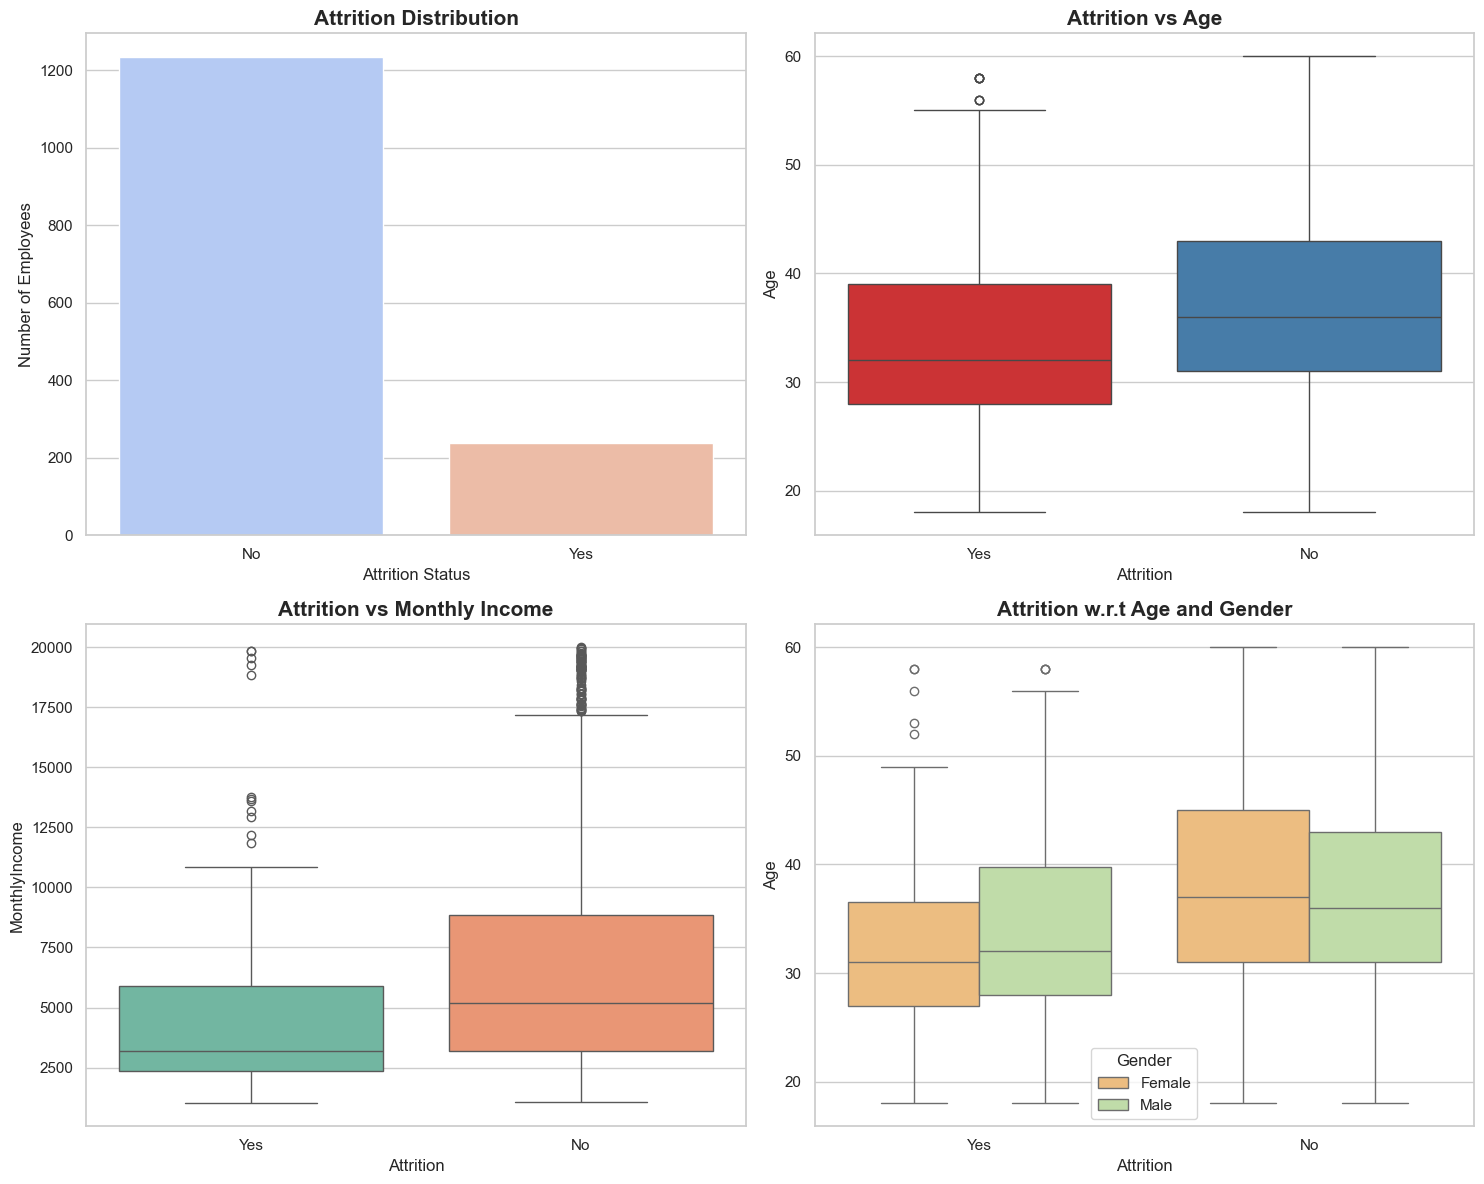

In [18]:
sns.set(style="whitegrid")

# Create subplots with 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Define unique color palettes for each plot
palettes = ['coolwarm', 'Set1', 'Set2', 'Spectral']

# Plot 1: Distribution of Attrition
attrition_counts = df['Attrition'].value_counts()
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette=palettes[0], ax=axs[0, 0])
axs[0, 0].set_title('Attrition Distribution', fontsize=15, fontweight='bold')
axs[0, 0].set_xlabel('Attrition Status')
axs[0, 0].set_ylabel('Number of Employees')

# Plot 2: Attrition vs Age
sns.boxplot(x='Attrition', y='Age', data=df, palette=palettes[1], ax=axs[0, 1])
axs[0, 1].set_title('Attrition vs Age', fontsize=15, fontweight='bold')

# Plot 3: Attrition vs Monthly Income
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette=palettes[2], ax=axs[1, 0])
axs[1, 0].set_title('Attrition vs Monthly Income', fontsize=15, fontweight='bold')

# Plot 4: Attrition w.r.t Age and Gender
sns.boxplot(x='Attrition', y='Age', hue='Gender', data=df, palette=palettes[3], ax=axs[1, 1])
axs[1, 1].set_title('Attrition w.r.t Age and Gender', fontsize=15, fontweight='bold')

# Adjust layout for a neat display
plt.tight_layout()
plt.show()

Insights from the dataset:

Attrition Distribution:
A significant majority of employees have not left the company, while a smaller proportion have experienced attrition (i.e., left).

Attrition vs Age:
Employees who left the company tend to have a slightly younger median age compared to those who stayed. There is a visible concentration of younger employees among those who left.

Attrition vs Monthly Income:
Employees with higher Monthly Incomes seem less likely to leave. Those who left the company generally have lower incomes, which could indicate a correlation between salary and employee retention.

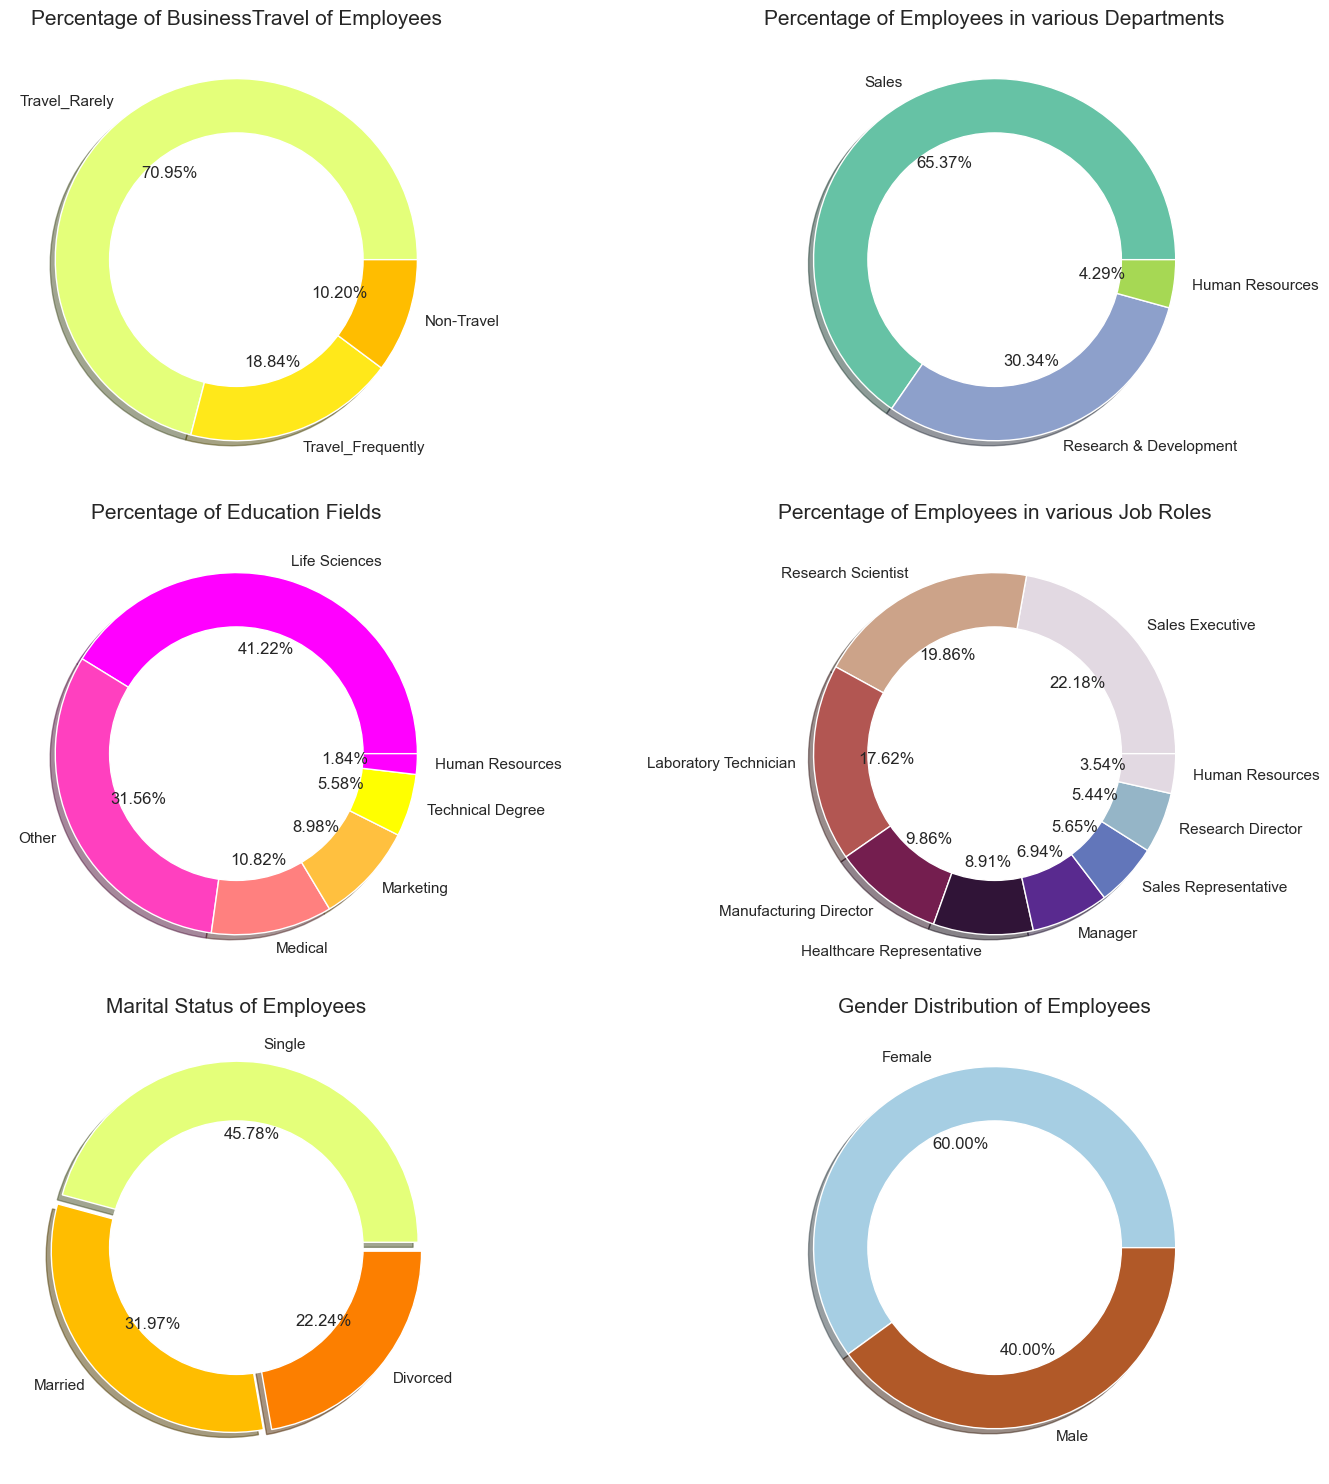

In [10]:
plots_info = [
    ('BusinessTravel', plt.cm.Wistia(np.linspace(0, 1, 5)), 'Percentage of BusinessTravel of Employees'),
    ('Department', plt.cm.Set2(np.linspace(0, 1, 5)), 'Percentage of Employees in various Departments'),
    ('EducationField', plt.cm.spring(np.linspace(0, 1, 5)), 'Percentage of Education Fields'),
    ('JobRole', plt.cm.twilight_r(np.linspace(0, 1, 9)), 'Percentage of Employees in various Job Roles'),
    ('MaritalStatus', plt.cm.Wistia(np.linspace(0, 1, 3)), 'Marital Status of Employees', [0.03, 0.03, 0.03]),
    ('Gender', plt.cm.Paired(np.linspace(0, 1, 2)), 'Gender Distribution of Employees')
]

# Create a 3x2 subplot grid (6 spaces)
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs = axs.flatten()

# Loop through each dataset and create a pie chart
for i, (column, colors, title, *explode) in enumerate(plots_info):
    size = df[column].value_counts()
    labels = df[column].unique()
    circle = plt.Circle((0, 0), radius=0.7, color='white')

    axs[i].pie(size, colors=colors, labels=labels, shadow=True, autopct='%.2f%%', explode=explode[0] if explode else None)
    axs[i].set_title(title, fontsize=15)
    axs[i].add_artist(circle)

# Adjust layout and show all the plots
plt.tight_layout()
plt.show()

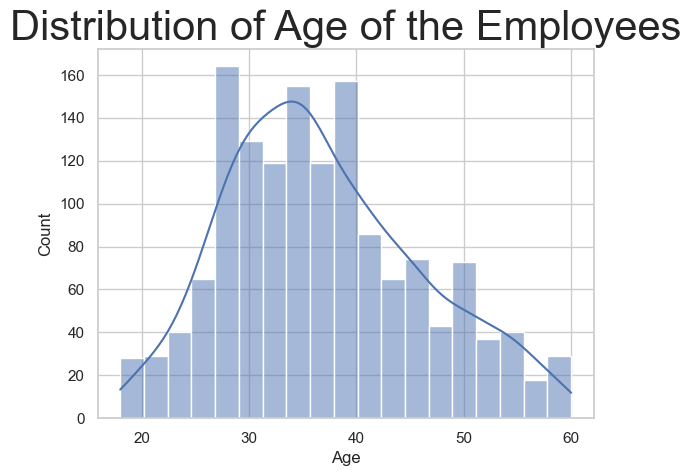

In [11]:
sns.histplot(df['Age'],kde=True)
plt.title('Distribution of Age of the Employees', fontsize=30)
plt.xlabel('Age')
plt.show()

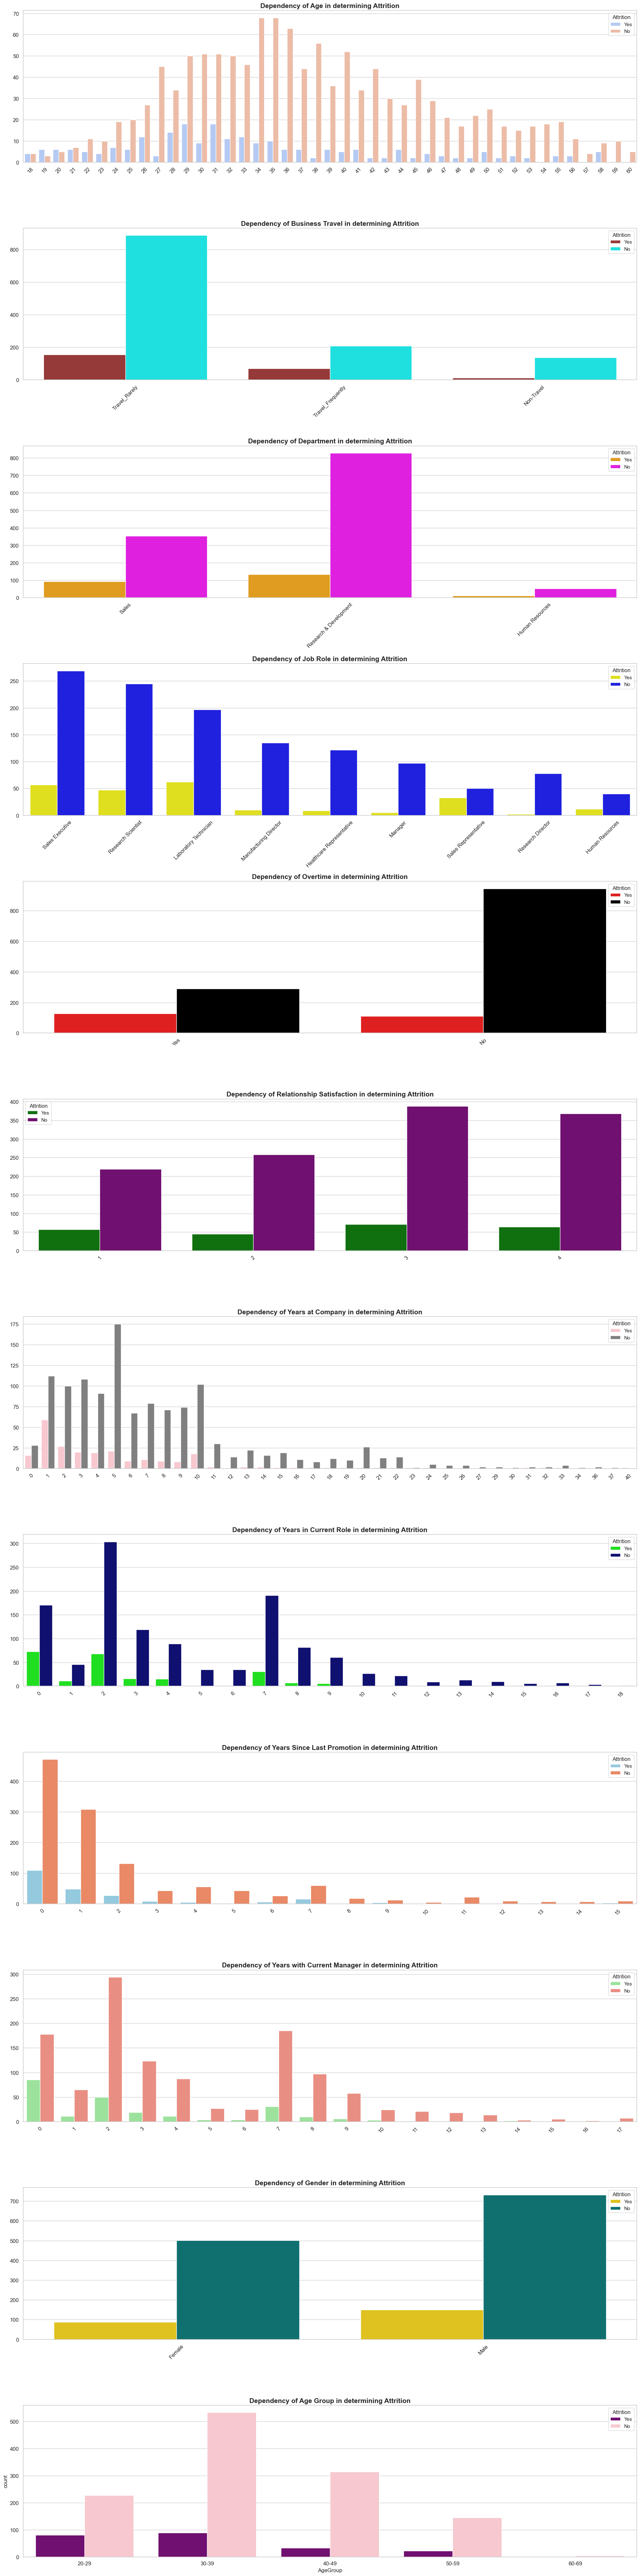

In [17]:
sns.set(style="whitegrid")

# Create a 12x1 grid to hold all plots with increased height
fig, axs = plt.subplots(12, 1, figsize=(20, 80))  # Adjusted height
axs = axs.flatten()  # Flatten the array of axes for easy indexing

# Set x and y tick font sizes
xtick_fontsize = 12
ytick_fontsize = 12

# Define columns to plot, their titles, and unique palettes for each plot
columns = ['Age', 'BusinessTravel', 'Department', 'JobRole', 'OverTime', 'RelationshipSatisfaction',
           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Gender']
titles = [
    'Dependency of Age in determining Attrition',
    'Dependency of Business Travel in determining Attrition',
    'Dependency of Department in determining Attrition',
    'Dependency of Job Role in determining Attrition',
    'Dependency of Overtime in determining Attrition',
    'Dependency of Relationship Satisfaction in determining Attrition',
    'Dependency of Years at Company in determining Attrition',
    'Dependency of Years in Current Role in determining Attrition',
    'Dependency of Years Since Last Promotion in determining Attrition',
    'Dependency of Years with Current Manager in determining Attrition',
    'Dependency of Gender in determining Attrition'
]
# Unique color palettes for each plot
palettes = [
    'coolwarm', ['brown', 'cyan'], ['orange', 'magenta'], ['yellow', 'blue'], ['red', 'black'],
    ['green', 'purple'], ['pink', 'grey'], ['lime', 'navy'], ['skyblue', 'coral'], ['lightgreen', 'salmon'],
    ['gold', 'teal']
]

# Iterate over the columns and create countplots with unique palettes
for i, col in enumerate(columns):
    sns.countplot(x=col, hue='Attrition', data=df, ax=axs[i], palette=palettes[i])
    axs[i].set_title(titles[i], fontsize=15, fontweight='bold')  # Bolded titles
    axs[i].tick_params(axis='x', labelsize=xtick_fontsize)
    axs[i].tick_params(axis='y', labelsize=ytick_fontsize)
    axs[i].set_xlabel('')  # Remove x-label for a cleaner look
    axs[i].set_ylabel('')  # Remove y-label for a cleaner look
    plt.sca(axs[i])
    plt.xticks(rotation=45)

# Plot 12: Age Group vs Attrition with its own unique palette
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

sns.countplot(x='AgeGroup', hue='Attrition', data=df, ax=axs[11], palette=['purple', 'pink'])
axs[11].set_title('Dependency of Age Group in determining Attrition', fontsize=15, fontweight='bold')  # Bolded title
axs[11].tick_params(axis='x', labelsize=xtick_fontsize)
axs[11].tick_params(axis='y', labelsize=ytick_fontsize)
plt.xticks(rotation=45)

# Adjust layout for spacing and show the figure
plt.tight_layout()
plt.show()

# Key Insights & Recommendations:

**Focus on Employee Retention:** Roles like Sales Representatives and younger employees should be key focus areas for improving retention.<br>
**Work-Life Balance:** High overtime work is a likely factor driving attrition, so introducing policies to promote work-life balance could reduce turnover.<br>
**Career Development Programs:** Younger employees and those with lower education levels could benefit from mentorship and career development programs to increase engagement and reduce attrition.<br>
**Diversity Initiatives:** The gender imbalance suggests the need for stronger diversity and inclusion efforts, especially in recruitment and retention strategies.

# Feature Engineering

**Clean Data**

In [43]:
categorical_columns = df.select_dtypes(exclude=np.number).columns

numerical_columns = df.select_dtypes(include=np.number).columns

In [44]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)



categorical_col = []

for column in df.columns:

    if df[column].dtype == object and len(df[column].unique()) <= 50:

        categorical_col.append(column)

In [45]:
df['Attrition'] = df.Attrition.astype("category").cat.codes

In [46]:
categorical_col.remove('Attrition')

**one-hot encoding**"

In [47]:
data = pd.get_dummies(df,categorical_col,drop_first=True)

In [48]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,...,True,False,False,False,False,False,False,True,False,False


**Modeling**


In [49]:
X = data.drop('Attrition',axis=1)

y = data['Attrition']

In [50]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for cols in X.select_dtypes('object').columns:
    X[cols]=le.fit_transform(X[cols])

In [51]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

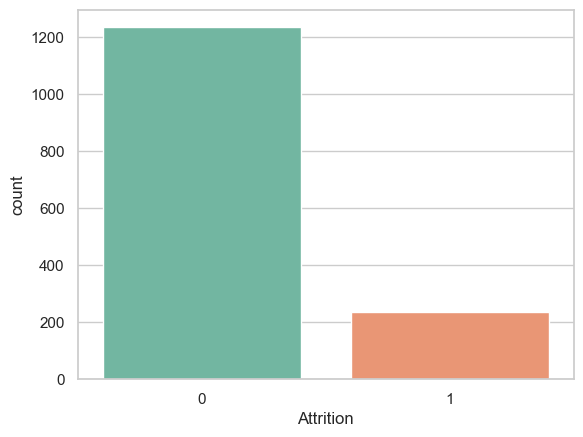

In [53]:
sns.countplot(x=df['Attrition'],palette='Set2')

In [54]:
model=Sequential()
model.add(Dense(30,activation='relu',kernel_initializer='he_normal',kernel_regularizer='l2'))

model.add(Dense(100,activation='tanh'))

model.add(Dense(100,activation='silu'))

model.add(Dense(100,activation='tanh'))

model.add(Dense(100,activation='elu'))

model.add(Dense(100,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [55]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
model.fit(x=X_train,y=y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7337 - loss: 1.0509 - val_accuracy: 0.8673 - val_loss: 0.8127
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8420 - loss: 0.8038 - val_accuracy: 0.8571 - val_loss: 0.7372
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8715 - loss: 0.6690 - val_accuracy: 0.8673 - val_loss: 0.6735
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8925 - loss: 0.6039 - val_accuracy: 0.8639 - val_loss: 0.6569
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8880 - loss: 0.5592 - val_accuracy: 0.8741 - val_loss: 0.6189
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9002 - loss: 0.5145 - val_accuracy: 0.8776 - val_loss: 0.6000
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9045 - loss: 0.4846 - val_accuracy: 0.8707 - val_loss: 0.5893
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9208 - loss: 0.4325 - val_accuracy: 0

In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │           1,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │           3,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,855 (526.78 KB)

 Trainable params: 44,951 (175.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 89,904 (351.19 KB)

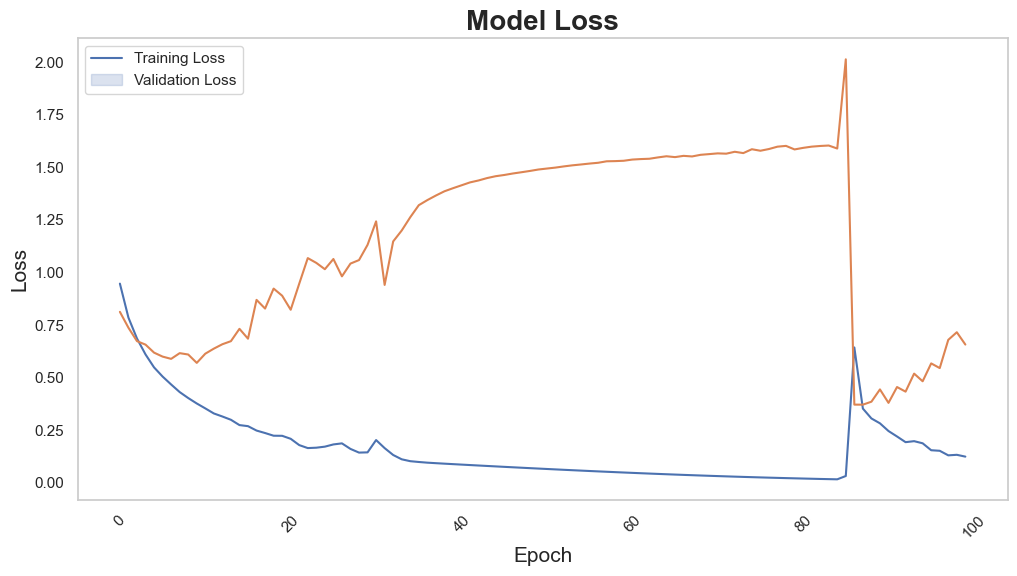

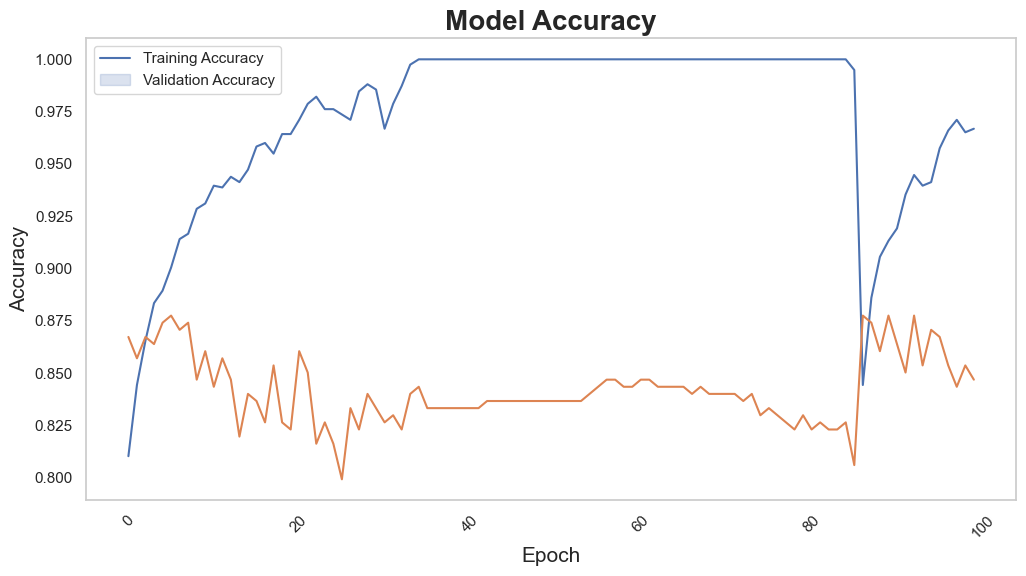

In [58]:
Results = pd.DataFrame(model.history.history)

# Set plot style
sns.set(style="whitegrid")

# Create a figure for the plots
plt.figure(figsize=(12, 6))

# Plotting loss
sns.lineplot(data=Results[['loss', 'val_loss']], dashes=False)
plt.title('Model Loss', fontsize=20, fontweight='bold')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(rotation=45)
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

# Show the plot
plt.show()

# Create a figure for the accuracy plots
plt.figure(figsize=(12, 6))

# Plotting accuracy
sns.lineplot(data=Results[['accuracy', 'val_accuracy']], dashes=False)
plt.title('Model Accuracy', fontsize=20, fontweight='bold')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(rotation=45)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

# Show the plot
plt.show()

In [59]:
model.evaluate(x=X_test,y=y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8245 - loss: 0.7310 


[0.6572781801223755, 0.8469387888908386]

In [60]:
predictions=(model.predict(X_test) >0.5).astype('int32')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


<Axes: >

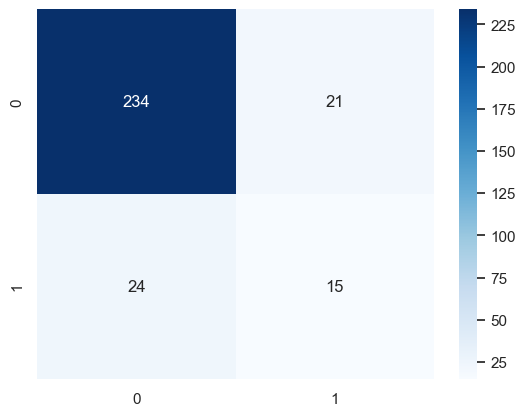

In [63]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')